# Learning BN as probabilistic classifier

Learning a Bayesian network can be used to obtain a classifier for one of the nodes of the model. For more about classifier, see `pyagrum.skbn`.

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://pyagrum.gitlab.io) |[ ![interactive online version](images/atbinder.svg)](https://mybinder.org/v2/gl/agrumery%2FaGrUM/forBinder?urlpath=%2Fdoc%2Ftree%2Fwrappers%2Fpyagrum%2Fdoc%2Fsphinx%2Fnotebooks%2F32-Learning_learningClassifier.ipynb)

In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

from pyagrum.lib.bn2roc import showROC, showPR, showROC_PR

SIZE_LEARN = 10000
SIZE_VALID = 2000

In [2]:
bn = gum.loadBN("res/alarm.dsl")
bn

(pyagrum.BayesNet@0x805221800) BN{nodes: 37, arcs: 46, domainSize: 10^16.2389, dim: 509, mem: 5Ko 896o}

In [3]:
gum.generateSample(bn, SIZE_LEARN, "out/learn.csv", show_progress=True, with_labels=True)
gum.generateSample(bn, SIZE_VALID, "out/train.csv", show_progress=True, with_labels=True)

out/learn.csv:   0%|                                       |

out/learn.csv: 100%|███████████████████████████████████████|

Log2-Likelihood : -150642.1695277766


out/train.csv:   0%|                                       |

out/train.csv: 100%|███████████████████████████████████████|

Log2-Likelihood : -30290.465260753102


-30290.465260753102

## Learning a BN from learn.csv

In [4]:
# Learning a BN from the database
learner = gum.BNLearner("out/train.csv")

bn2 = learner.useMIIC().learnBN()
currentTime = learner.currentTime()

In [5]:
gnb.flow.add(gnb.getBN(bn2, size="9"), f"Learned with {SIZE_LEARN} lines in {currentTime:.3f}s")
gnb.flow.display()

In [6]:
import pyagrum.lib.bn_vs_bn as bnvsbn

gnb.flow.add(gnb.getBNDiff(bn, bn2, size="8!"), "Diff with MIIC")
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.display()

In [7]:
bn3 = learner.useGreedyHillClimbing().useNMLCorrection().useScoreBDeu().learnBN()
gnb.flow.add(gnb.getBNDiff(bn, bn3, size="8!"), "Diff with GHC/NMD/BDEU")
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.display()

In [8]:
bn4 = learner.useGreedyHillClimbing().useNMLCorrection().useScoreBDeu().setInitialDAG(bn2.dag()).learnBN()
gnb.flow.add(gnb.getBNDiff(bn, bn4, size="8!"), "Diff with GHC/NMD/BDEU with intial DAG from MIIC")
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.display()

In [9]:
print(bn2.names())

{'PAP', 'HREKG', 'SAO2', 'ANAPHYLAXIS', 'TPR', 'HRSAT', 'DISCONNECT', 'CO', 'PCWP', 'SHUNT', 'INTUBATION', 'CATECHOL', 'BP', 'VENTTUBE', 'STROKEVOLUME', 'MINVOLSET', 'HISTORY', 'VENTALV', 'INSUFFANESTH', 'FIO2', 'CVP', 'EXPCO2', 'VENTLUNG', 'PULMEMBOLUS', 'MINVOL', 'VENTMACH', 'ERRLOWOUTPUT', 'HR', 'PVSAT', 'HYPOVOLEMIA', 'LVEDVOLUME', 'ERRCAUTER', 'ARTCO2', 'KINKEDTUBE', 'LVFAILURE', 'HRBP', 'PRESS'}


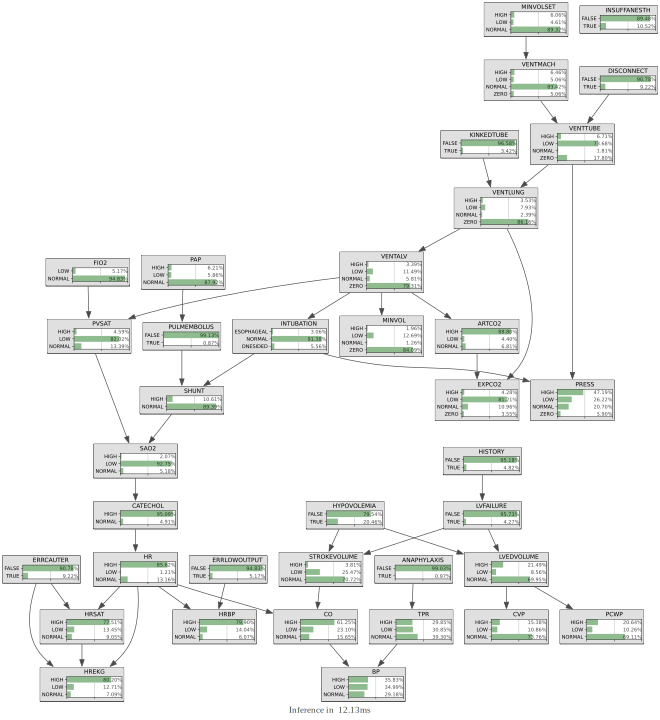

In [10]:
gnb.showInference(bn2, evs={}, size="10")

## Two classifiers from the learned BN

In [11]:
print(bn2["HRSAT"])
print(bn2["INTUBATION"])

HRSAT:Labelized({HIGH|LOW|NORMAL})
INTUBATION:Labelized({ESOPHAGEAL|NORMAL|ONESIDED})


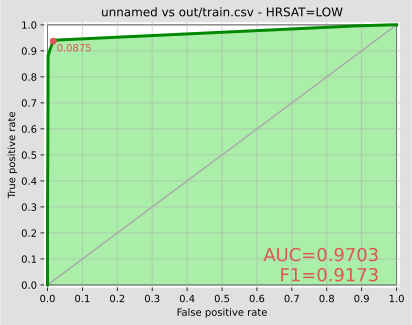

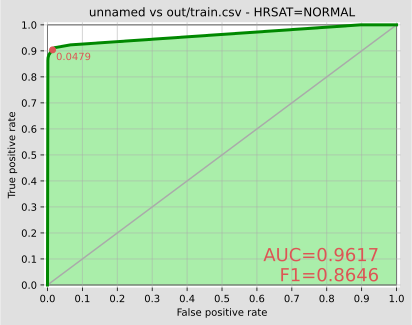

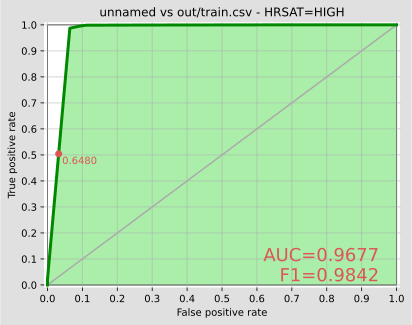

In [12]:
showROC(bn2, "out/train.csv", "HRSAT", "LOW", show_progress=False)
showROC(bn2, "out/train.csv", "HRSAT", "NORMAL", show_progress=False)
showROC(bn2, "out/train.csv", "HRSAT", "HIGH", show_progress=False);

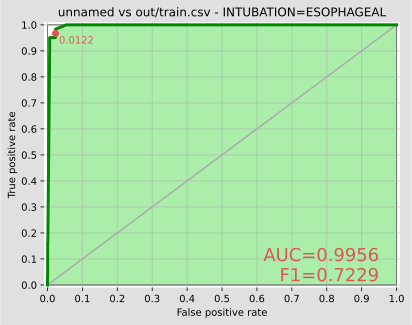

In [13]:
showROC(bn2, "out/train.csv", "INTUBATION", "ESOPHAGEAL", show_progress=False);

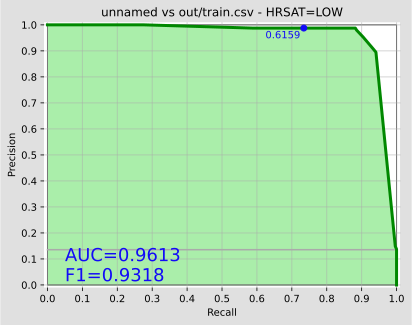

In [14]:
showPR(bn2, "out/train.csv", "HRSAT", "LOW", show_progress=False);

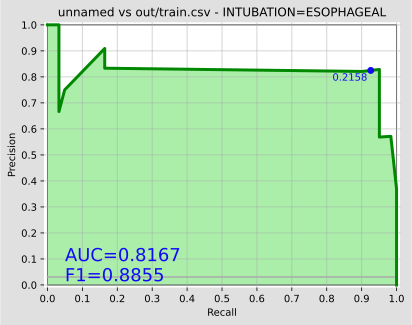

In [15]:
showPR(bn2, "out/train.csv", "INTUBATION", "ESOPHAGEAL", show_progress=False);

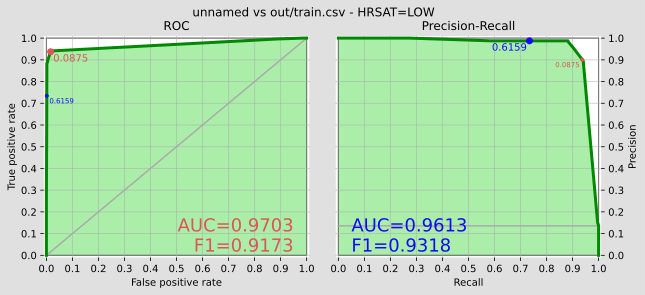

In [16]:
showROC_PR(bn2, "out/train.csv", "HRSAT", "LOW", show_progress=False);

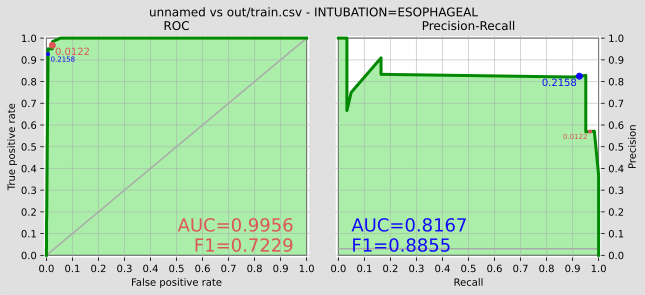

In [17]:
showROC_PR(bn2, "out/train.csv", "INTUBATION", "ESOPHAGEAL", show_progress=False);